In [1]:
#pip install pandas-datareader
from datetime import datetime
import pandas_datareader.data as wb
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
# Machine Learning Library
from fbprophet import Prophet
import lightgbm as lgb

from sklearn.model_selection import train_test_split

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


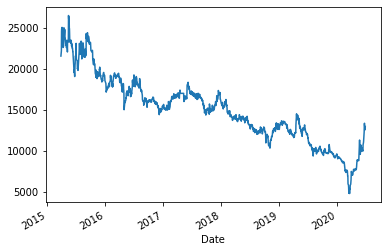

In [4]:

start = datetime(1999,1,1)
end = datetime(2020,6,30)
samsung2 = wb.DataReader('138250.KS', 'yahoo',start,end)
samsung2['Close'].plot()

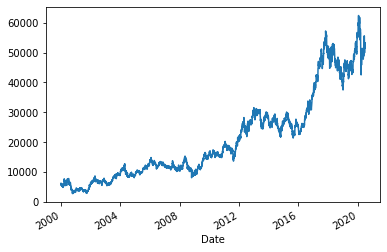

In [6]:
start = datetime(1999,1,1)
end = datetime(2020,6,30)
samsung2 = wb.DataReader('005930.KS', 'yahoo',start,end)
samsung2['Close'].plot()

In [11]:
from datetime import datetime
import pandas_datareader.data as wb
 
start = datetime(2017,1,1)
end = datetime(2020,6,30)

# 한국
#danawa = wb.DataReader('119860.KS', 'yahoo',start,end)
LGuplus = wb.DataReader('032640.KS', 'yahoo',start,end)
koreaoil = wb.DataReader('002960.KS', 'yahoo',start,end)
LGhealth = wb.DataReader('051900.KS', 'yahoo',start,end)
Samyang = wb.DataReader('003230.KS', 'yahoo',start,end)
Orion = wb.DataReader('271560.KS', 'yahoo',start,end)
#Notus = wb.DataReader('278650.KS', 'yahoo',start,end)
sky = wb.DataReader('053210.KS', 'yahoo',start,end)
NCsoft = wb.DataReader('036570.KS', 'yahoo',start,end)

In [12]:
symbols = ['LGuplus','koreaoil','LGhealth','Samyang','Orion','sky','NCsoft']
data = pd.DataFrame()
data['LGuplus']=LGuplus['Close']
data['koreaoil ']=koreaoil ['Close']
data['LGhealth']=LGhealth['Close']
data['Samyang']=Samyang['Close']
data['Orion']=Orion['Close']
data['sky']=sky['Close']
data['NCsoft']=NCsoft['Close']
data.columns = symbols
noa = len(symbols)
data.tail()


,LGuplus,koreaoil,LGhealth,Samyang,Orion,sky,NCsoft
Date,,,,,,,
2020-06-24,12250.0,240500.0,1345000.0,133000.0,137000.0,8150.0,943000.0
2020-06-25,11900.0,236500.0,1277000.0,131500.0,134500.0,8030.0,912000.0
2020-06-26,12350.0,235000.0,1337000.0,129000.0,137000.0,8030.0,909000.0
2020-06-29,12100.0,233000.0,1300000.0,128000.0,139000.0,7940.0,890000.0
2020-06-30,12200.0,231500.0,1346000.0,126000.0,134000.0,7930.0,891000.0


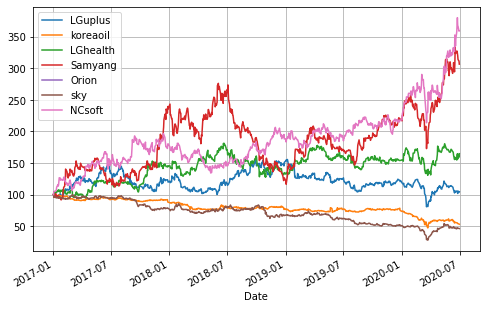

In [13]:
(data / data.iloc[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()

In [14]:
rets = np.log(data / data.shift(1))
rets.mean() * 252
#252곱하는 이유 = 일간 파라미터로 계산된 값을 연간 파라미터로 변환

LGuplus     0.012436
koreaoil   -0.188808
LGhealth    0.148363
Samyang     0.332912
Orion       0.170141
sky        -0.230086
NCsoft      0.380055
dtype: float64

In [15]:
rets.cov() * 252

,LGuplus,koreaoil,LGhealth,Samyang,Orion,sky,NCsoft
LGuplus,0.105814,0.015710,0.008840,0.014742,0.018937,0.026504,0.013478
koreaoil,0.015710,0.038342,0.012449,0.012326,0.015318,0.020360,0.005824
LGhealth,0.008840,0.012449,0.111599,0.026297,0.042944,0.018304,0.018714
Samyang,0.014742,0.012326,0.026297,0.219948,0.017887,0.030130,0.033245
Orion,0.018937,0.015318,0.042944,0.017887,0.172776,0.017539,0.018729
sky,0.026504,0.020360,0.018304,0.030130,0.017539,0.080908,0.014182
NCsoft,0.013478,0.005824,0.018714,0.033245,0.018729,0.014182,0.137373


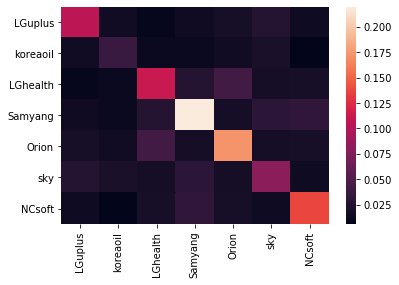

In [16]:
sns.heatmap(rets.cov() * 252)
plt.show()

In [17]:
np.random.seed(2)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.18149384, 0.01079245, 0.22881083, 0.18121389, 0.17498867,
       0.13751018, 0.08519014])

In [18]:
np.sum(rets.mean() * weights) * 252

0.1250052323569492

In [19]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.04221790638561615

In [20]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.2054699646800382

In [21]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

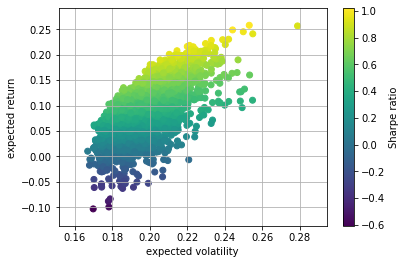

In [22]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

# 샤프지수
샤프지수:  위험 자산에 투자함으로써 얻은 초과 수익의 정도를 나타내는 지표
-> 초과수익률 ÷ 초과수익의 표준편차

초과 수익률=펀드 수익률－무위험 수익률
(무위험 수익률로 보통 국공채 수익률을 이용)

샤프 지수가 1 정도면 그럭저럭 괜찮은 펀드, 2 정도면 쓸만한 펀드 3 이상이면 아주 괜찮은 펀드

다른 펀드와의 비교 목적으로 사용 하는 것이 바람직

->  종합적으로 평가


In [23]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        포트폴리오 내의 증권 비중
    
    Returns
    =======
    pret : float
        포트폴리오 수익률의 기댓값
    pvol : float
        포트폴리오 변동성의 기댓값
    pret / pvol : float
        무위험 이자율이 0일 때의 포트폴리오 샤프 지수
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])


# 샤프지수 최대화

In [24]:
import scipy.optimize as sco

In [25]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [31]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})


In [32]:
bnds = tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [33]:
noa * [1. / noa,]

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285]

In [34]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

Wall time: 83.7 ms


In [35]:
opts

     fun: -1.1882082847604598
     jac: array([ 1.81803495e-01,  8.53013664e-01, -7.93188810e-05,  1.60932541e-05,
       -9.59783792e-05,  1.16507535e+00,  2.92658806e-05])
 message: 'Optimization terminated successfully.'
    nfev: 65
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.00000000e+00, 3.86933232e-16, 1.11180796e-01, 2.38816467e-01,
       1.12149716e-01, 0.00000000e+00, 5.37853021e-01])

In [36]:
opts['x'].round(3)

array([0.   , 0.   , 0.111, 0.239, 0.112, 0.   , 0.538])

In [37]:
statistics(opts['x']).round(3)

array([0.319, 0.269, 1.188])

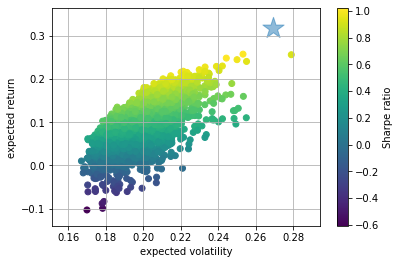

In [38]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_opts = statistics(opts['x']).round(3)
plt.scatter(pt_opts[1], pt_opts[0], marker="*", s=500, alpha=0.5)
plt.show()


# 포트폴리오 분산 최소화

In [39]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [40]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [42]:
optv

     fun: 0.02575312967040336
     jac: array([0.05148858, 0.05150159, 0.05130415, 0.05112341, 0.05158286,
       0.05163992, 0.0517072 ])
 message: 'Optimization terminated successfully.'
    nfev: 108
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.11045304, 0.4979273 , 0.1069685 , 0.03443838, 0.04079873,
       0.09102599, 0.11838807])

In [43]:
optv['x'].round(3)

array([0.11 , 0.498, 0.107, 0.034, 0.041, 0.091, 0.118])

In [44]:
statistics(optv['x']).round(3)

array([-0.034,  0.16 , -0.214])

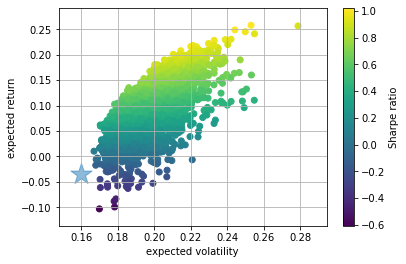

In [45]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

pt_optv = statistics(optv['x']).round(3)
plt.scatter(pt_optv[1], pt_optv[0], marker="*", s=500, alpha=0.5)
plt.show()

# 효율적 투자선

In [46]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [47]:

def min_func_port(weights):
    return statistics(weights)[1]

In [48]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 6.76 s


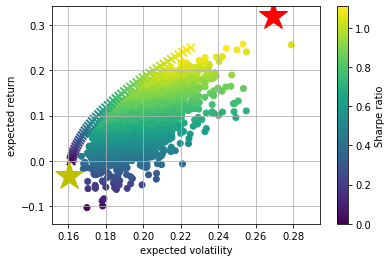

In [49]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # 무작위 포트폴리오
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x', s=70, linewidth=2)
            # 효율적 투자선
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=30)
            # 최대 샤프 지수를 가진 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=30)
            # 최소 분산 포트폴리오
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

# 스플라인 함수화

In [50]:
import scipy.interpolate as sci

In [51]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [52]:
tck = sci.splrep(evols, erets)

In [53]:
def f(x):
    ''' 효율적 투자선 함수 (스플라인 근사) '''
    return sci.splev(x, tck, der=0)

def df(x):
    ''' 효율적 투자선 함수의 1차 도함수 '''
    return sci.splev(x, tck, der=1)

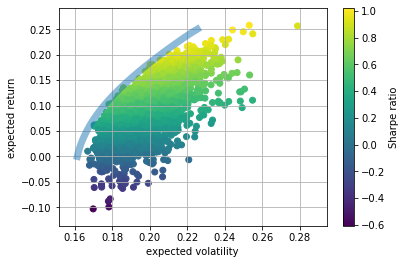

In [54]:
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # 무작위 포트폴리오

plt.plot(evols, f(evols), lw=7, alpha=0.5)    

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

# 자본시장선

In [55]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [56]:
opt = sco.fsolve(equations, [0.01, 1.0, 0.1])
opt

C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



array([0.01      , 2.00657987, 0.23032173])

In [57]:
np.round(equations(opt), 6)

array([ 0.      ,  0.211883, -0.048851])

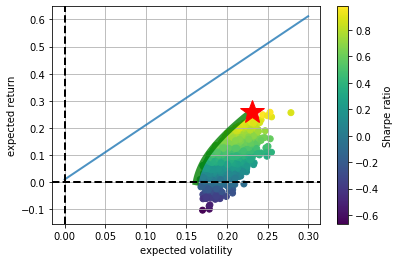

In [58]:
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # 무작위 포트폴리오
plt.plot(evols, erets, 'g', lw=6, alpha=0.8)
            # 효율적 투자선
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=2, alpha=0.8)
            # 자본 시장선
plt.plot(opt[2], f(opt[2]), 'r*', markersize=25.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [59]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
res['x'].round(3)

array([0.111, 0.   , 0.191, 0.181, 0.124, 0.   , 0.393])